
# Project: Investigate a Dataset (Tmdb-movies)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Tmdb-movies
(original source on Kaggle) =====> 'tmdb-movies.csv'

Context

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.



# Data Dictionary (21 variables)

01 - id

02 - imdb_id

03 - popularity

04 - budget

05 - revenue

06 - original_title

07 - cast

08 - homepage

09 - director

10 - tagline

11 - keywords

12 - overview

13 - runtime

14 - genres

15 - production_companies

16 - release_date
 
17 - vote_count

18 - vote_average

19 - release_year

20 - budget_adj

21 - revenue_adj


# Questions for Analysis

- Which genres are most popular from year to year?

- What kinds of properties are associated with movies that have high revenues?

- What is the average year-over-year film production for each film genre?

- What are the highest grossing, rated, number of votes, and popular genres of movies?

- Top 10 movies?

- What types of movie-related properties generate high revenue?

- What kinds of characteristics are associated with the most popular films?

- What Kinds of Characteristics Are Associated with Top Rated Movies?

- What is the relationship between popularity and voter turnout?

- What is the relationship between the percentage of voting and the percentage of voting?

- Is there a relationship between budget and uptime?

- Is there a relationship between budget and revenue?

- The most famous directors?

- Average runtime?

In [1]:
# set up import statements for all of the packages that i plan to use.

import os as os                          # accessing directory structure
import datetime as dt
import numpy as np                       # linear algebra
import pandas as pd                      # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt          
%matplotlib inline                       
import matplotlib.pylab as pylab         
import seaborn as sns                    # visualization
plt.style.use('seaborn-colorblind')
params = {'legend.fontsize': 'x-large','figure.figsize': (15, 5),'axes.labelsize': 'x-large','axes.titlesize':'x-large',
          'xtick.labelsize':'x-large','ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean my dataset for analysis.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#    types and look for instances of missing or possibly errant data.
# load data file into a dataframe
df = pd.read_csv('tmdb-movies.csv', sep=',')
pd.set_option('display.max_columns',200)
# Let's take a quick look at what the data looks like:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#df.tail()      # not needed

# Finding The Dimensions of the Dataframe

In [4]:
#Exploreing the shape of data
df.shape

(10866, 21)

 we have 10866 ID(rows) and 21 (columns)

In [5]:
list(df.columns)

['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

In [6]:
# The basic information about the data
# df.count()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

We need convert The 'release_date' column to datetime, and convert 'runtime' to int

In [7]:
df.duplicated().sum()

1

In [8]:
df.loc[df.duplicated(keep='first'), :]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [9]:
df.loc[df.duplicated(keep='last'), :]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [10]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Has nulls and 1 duplicate, We need to remove the unused and unimportnat column like ('homepage' & 'keywords')

In [11]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [12]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

Id unique are "10865".

In [13]:
df.original_title.duplicated().sum()

295

In [14]:
df.loc[df.original_title.duplicated(keep='first'), :]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1133,281778,tt3297792,0.188264,0,0,Survivor,Danielle Chuchran|Kevin Sorbo|Rocky Myers|Ruby...,http://www.arrowstormentertainment.com/#!survi...,John Lyde,Alone. Stranded. Deadly,survivor,During their search for a habitable planet the...,93,Science Fiction|Action|Fantasy,Arrowstorm Entertainment,7/22/14,23,4.9,2014,0.000000e+00,0.000000e+00
1194,296626,tt3534842,0.132764,0,0,Finders Keepers,Jaime Pressly|Kylie Rogers|Tobin Bell|Patrick ...,NaN,Alexander Yellen,NaN,profession|evil doll|possession|murder|problem...,A haunted doll teaches one little girl why chi...,85,Mystery|Thriller|Horror,HFD Productions|Hybrid LLC,10/18/14,33,4.8,2014,0.000000e+00,0.000000e+00
1349,42222,tt0076245,0.398651,0,0,Julia,Jane Fonda|Vanessa Redgrave|Jason Robards|Maxi...,NaN,Fred Zinnemann,"Through It All, Friendship Prevailed.",friends|playwright,JULIA covers the 1930s when Lillian attained f...,117,Drama,Twentieth Century Fox Film Corporation,10/2/77,10,5.0,1977,0.000000e+00,0.000000e+00
1440,7445,tt0765010,1.223786,26000000,43318349,Brothers,Tobey Maguire|Jake Gyllenhaal|Natalie Portman|...,NaN,Jim Sheridan,There are two sides to every family.,brother brother relationship|brother-in-law|lo...,When his helicopter goes down during his fourt...,104,Drama|Thriller|War,Lionsgate|Relativity Media|Sighvatsson Films|M...,1/27/09,381,6.7,2009,2.642641e+07,4.402879e+07
1513,62320,tt1014762,0.688361,0,0,Home,Glenn Close|Yann Arthus-Bertrand|Jacques Gambl...,http://www.homethemovie.org/,Yann Arthus-Bertrand,A Stunning Visual Portrayal of Earth,climate change|earth|global warming|water poll...,"With aerial footage from 54 countries, Home is...",95,Documentary,Europa Corp.|ElzÃ©vir Films|France 2 (FR2),6/3/09,109,7.8,2009,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10818,39995,tt0079482,0.047645,0,0,Long Weekend,John Hargreaves|Briony Behets|Mike McEwen|Roy ...,NaN,Colin Eggleston,Their crime was against nature. Nature found t...,beach|camping|attack|nature,When a suburban couple go camping for the week...,92,Horror|Thriller|Mystery,The Australian Film Commission|Victorian Film|...,10/14/78,17,6.1,1978,0.000000e+00,0.000000e+00
10827,2661,tt0060153,0.410366,1377800,0,Batman,Adam West|Burt Ward|Cesar Romero|Burgess Mered...,NaN,Leslie H. Martinson,He's Here Big As Life In A Real Bat-Epic,submarine|dc comics|shark attack|shark|shark r...,The Dynamic Duo faces four super-villains who ...,105,Family|Adventure|Comedy|Science Fiction|Crime,Twentieth Century Fox Film Corporation|DC Comi...,7/30/66,99,5.9,1966,9.256081e+06,0.000000e+00
10849,28270,tt0060445,0.206537,0,0,Gambit,Michael Caine|Shirley MacLaine|Herbert Lom|Joh...,NaN,Ronald Neame,Shirley MacLaine raises Michael Caine!,master thief,Harry Dean (Michael Caine) has a perfect plan ...,109,Action|Comedy|Crime,Universal Pictures,12/16/66,14,6.1,1966,0.000000e+00,0.000000e+00
10853,15598,tt0060086,0.163592,0,0,Alfie,Michael Caine|Shelley Winters|Millicent Martin...,NaN,Lewis Gilbert,Is any man an Alfie? Ask any girl!,womanizer|playboy,The film tells the story of a young man who le...,114,Comedy|Drama|Romance,NaN,3/29/66,26,6.2,1966,0.000000e+00,0.000000e+00


# Data Cleaning 

In [15]:
# convert the 'release_date' column to datetime
df.release_date = pd.to_datetime(df.release_date)
# convert the 'runtime' column to int
df.runtime = df.runtime.astype('int64')

#### Remove Duplicates

In [16]:
# Remove Duplicates
df.drop_duplicates(inplace=True)

In [17]:
df.duplicated().sum().any()

False

In [18]:
# delete duplicated movie titles
df.original_title.drop_duplicates(keep='last',inplace=False)
df.original_title.duplicated().sum()

294

#### Delete unused columns

In [19]:
# We need to remove the unused and unimportnat column like ('homepage' &'keywords')
#df = df.drop('homepage', axis = 1)
#df = df.drop('keywords', axis = 1)
df.drop(columns=['homepage', 'keywords'],inplace=True)

#### We need to fill  zero values\' cells with the mean value of each column

In [20]:
# fill Nan cells in columns with numerical values with the mean value.
#df.fillna(df.mean())

#df.budget = df.budget.replace(0,df.budget.mean())
#df.popularity = df.popularity.replace(0,df.popularity.mean())
#df.revenue = df.revenue.replace(0,df.revenue.mean())
#df.runtime = df.runtime.replace(0,df.runtime.mean())
#df.vote_average = df.vote_average.replace(0,df.vote_average.mean())
#df.vote_count = df.vote_count.replace(0,df.vote_count.mean())
#df.budget_adj = df.budget_adj.replace(0,df.budget_adj.mean())
#df.revenue_adj = df.revenue_adj.replace(0,df.revenue_adj.mean())

# use function
def fill_zero_values(column):
    df[column] = df[column].replace(0,df[column].mean())
    
fill_zero_values('budget')
fill_zero_values('popularity')
fill_zero_values('revenue')
fill_zero_values('runtime')
fill_zero_values('vote_average')
fill_zero_values('vote_count')
fill_zero_values('budget_adj')
fill_zero_values('revenue_adj')




#### We need to remove the NaN cells from dataset

In [21]:
# Removing null
df.dropna(inplace=True)

In [22]:
df.isnull().sum().any()

False

In [23]:
df.head() #final dataset

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [24]:
df.shape #Final data set structure

(7634, 19)

<a id='eda'></a>
## Exploratory Data Analysis




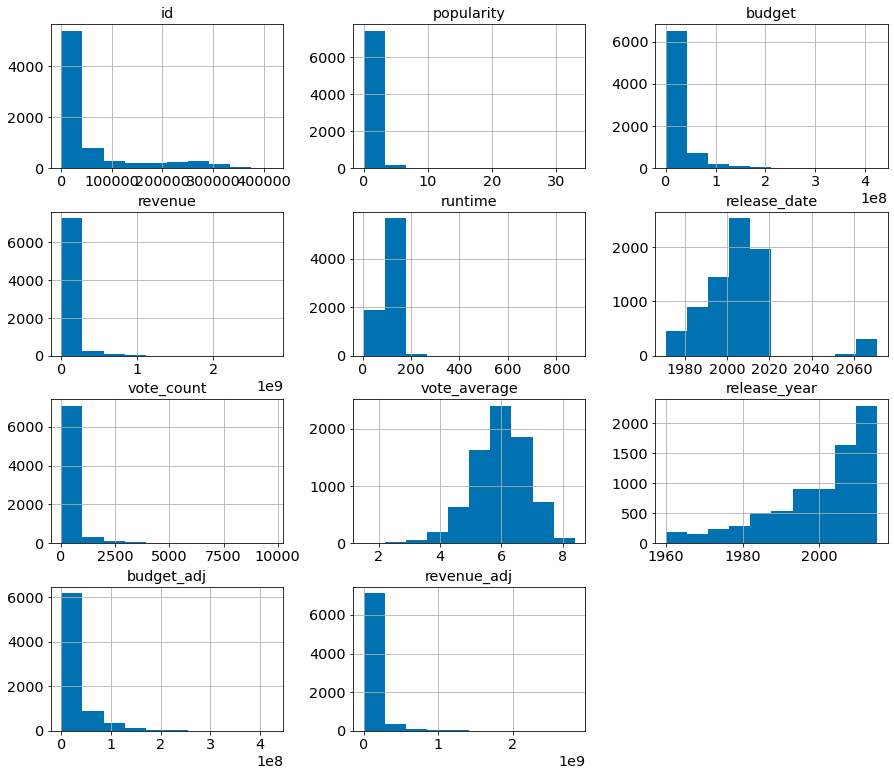

In [25]:
df.hist(figsize=(15,13));

Checking the corrolation to see the realtion between variables

### Q: What factors are important for us to know?

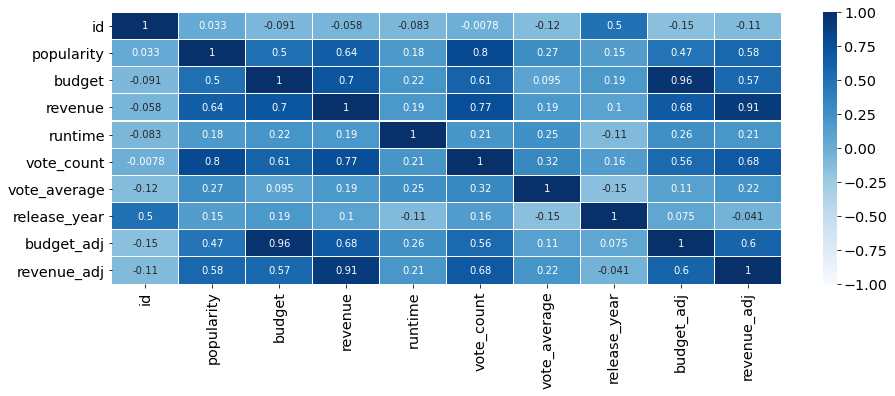

In [26]:
#help(sns.heatmap)
sns.heatmap(df.corr(), vmin = -1, vmax = 1, cmap = "Blues", linewidths=0.1, annot=True);

### Q: What rate of movie production over years for each movie genre?

In [27]:
#def plot_bar(df, genre): 
#    query = df.query('genres == "{}"'.format(genre))['release_year'].value_counts(ascending=True)
#    query.plot(kind = 'bar',figsize=(16,16))
#    plt.xlabel('Year', fontsize = 14)
#    plt.ylabel('Movie_count', fontsize= 14)
#    plt.title('Drama Over Years', fontsize=16);
    
#plot_bar(df, 'Comedy')

#use function sns.countplot(genre)
def countplot(df, genre):
    query = df.query('genres == "{}"'.format(genre))['release_year']
    yr = sns.countplot(data=df, x=query, linewidth=3)
                       #color='none')
    yr.set_xticklabels(yr.get_xticklabels(), rotation=80)
    plt.show();


#countplot(df, 'Comedy')

In [28]:
genre = df.genres.str.cat(sep='|')
genre = pd.Series(genre.split('|')).str.strip()
#genre.value_counts()
genre = list(genre.unique())
del genre[-1] #because Foreign movies have data bool value
genre

['Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Fantasy',
 'Crime',
 'Western',
 'Drama',
 'Family',
 'Animation',
 'Comedy',
 'Mystery',
 'Romance',
 'War',
 'History',
 'Music',
 'Horror',
 'Documentary',
 'TV Movie']

In [35]:
#x = list(df.query('genres == "Drama"')['release_year'])
#y = list(df.query('genres == "Drama"')['genres'])
#z = {'movies':y,
#    'date': x}
#data = pd.DataFrame(z)
#data
#sns.lineplot(data.date ,data.movies);
#plt.plot(data.date ,data.movies);

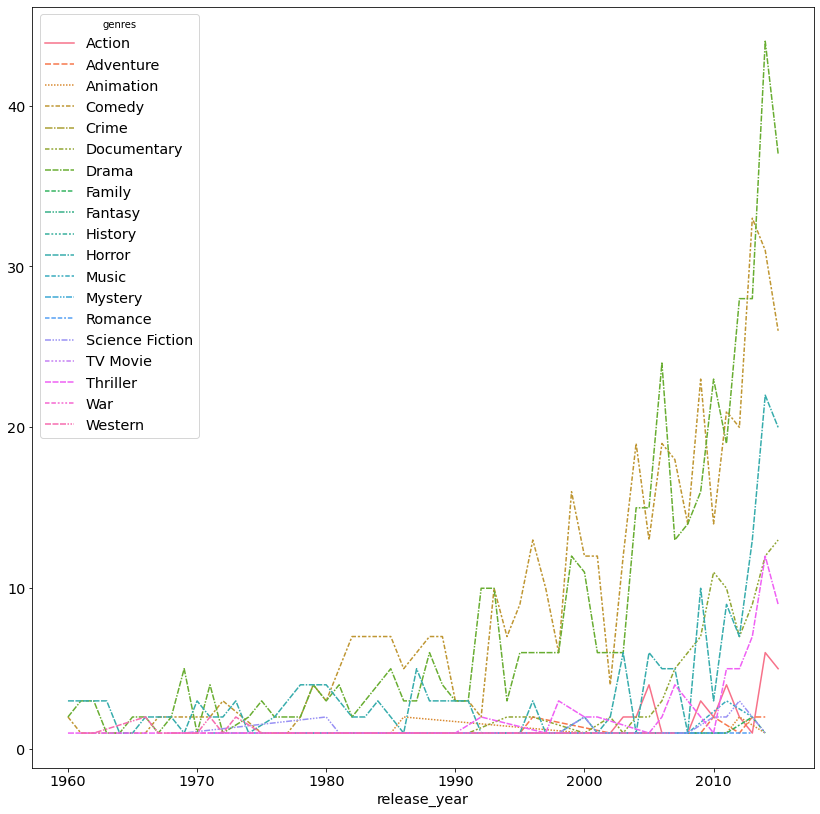

In [40]:
df_1 = df[df.genres.isin(genre)]
df_1=df_1.groupby(['release_year', 'genres']).size().unstack()

plt.figure(figsize= (14, 14))
sns.lineplot(data=df_1);

Action


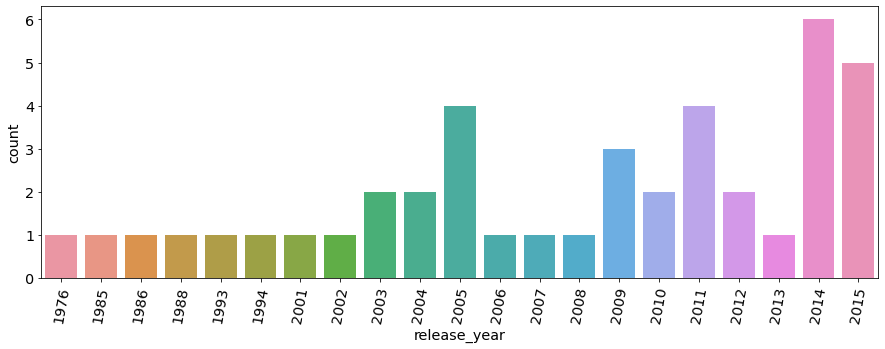

Adventure


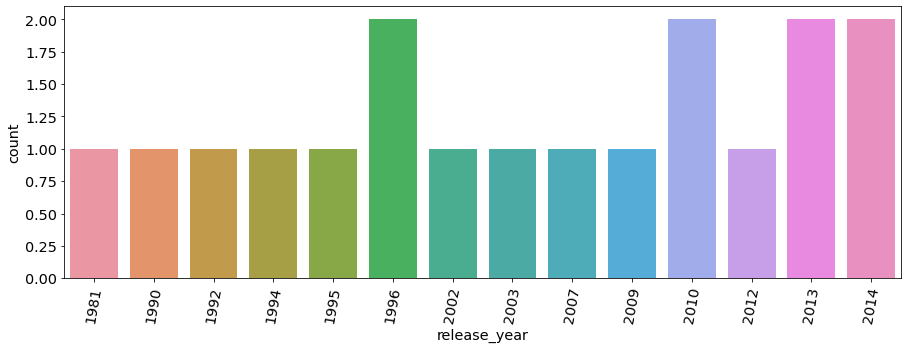

Science Fiction


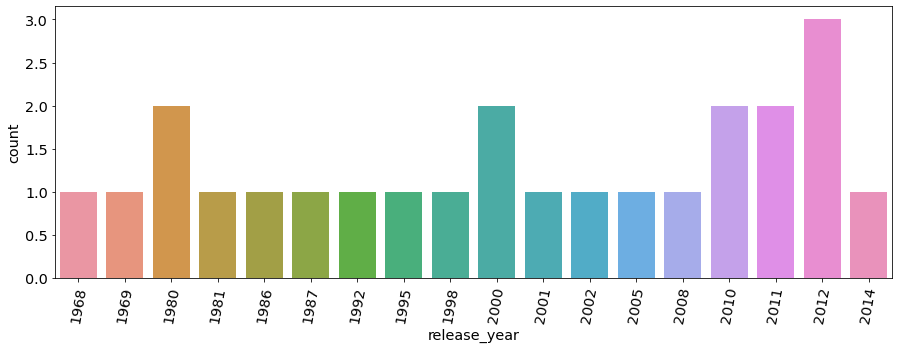

Thriller


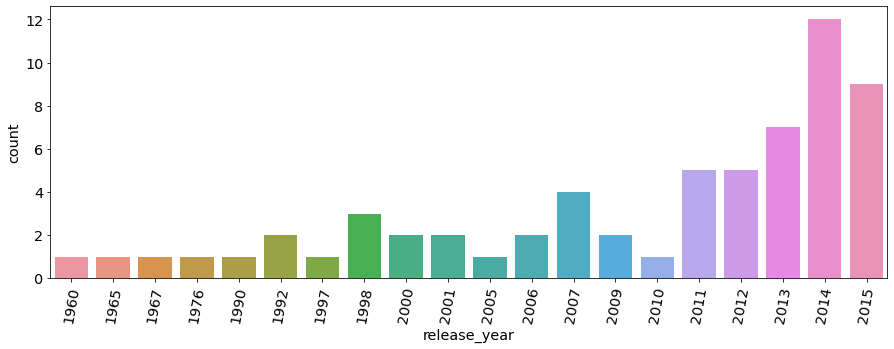

Fantasy


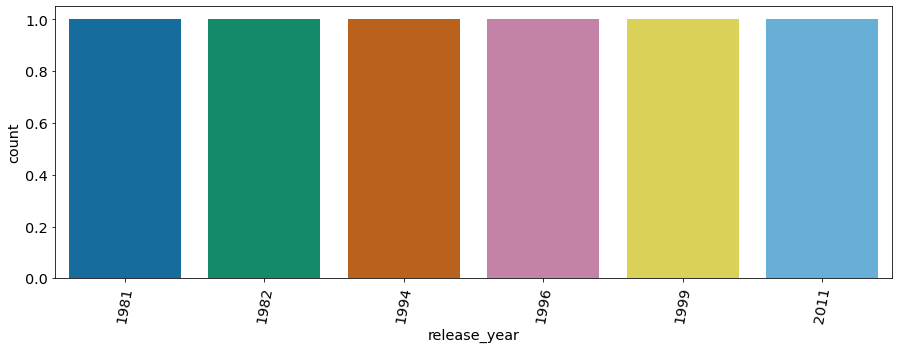

Crime


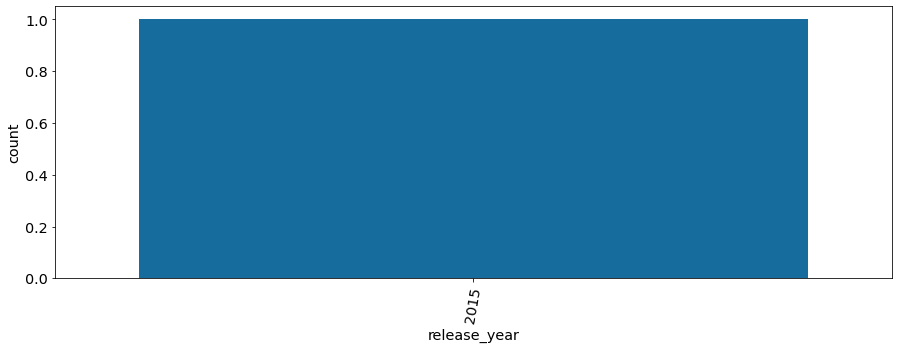

Western


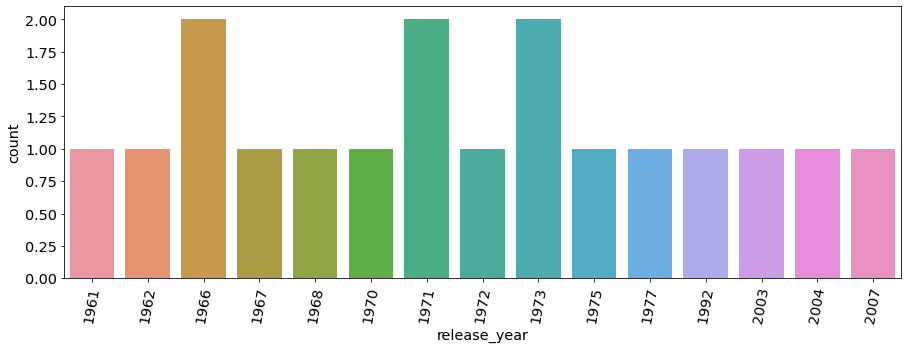

Drama


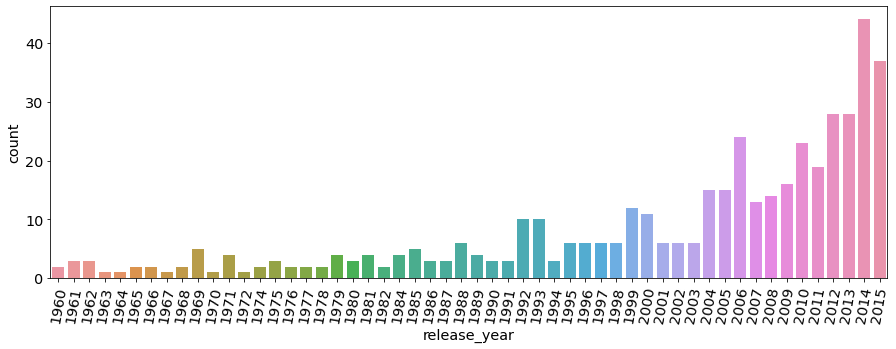

Family


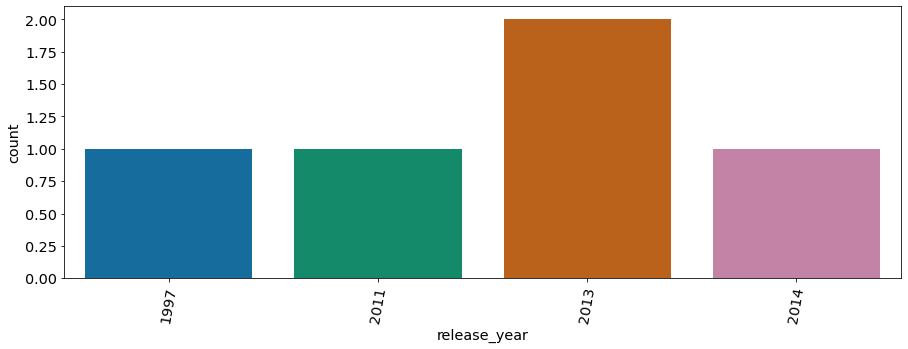

Animation


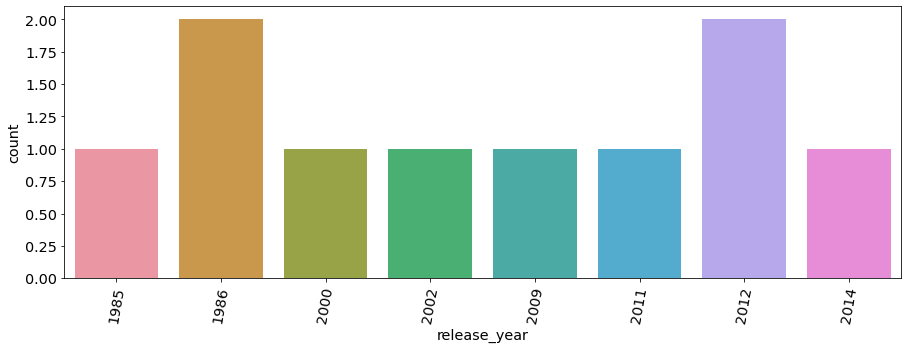

Comedy


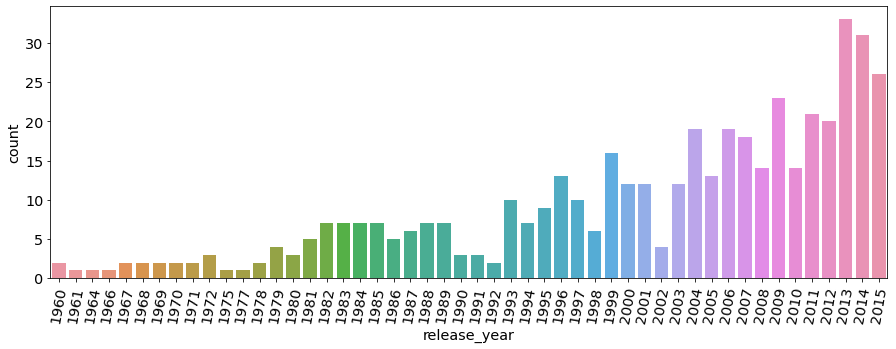

Mystery


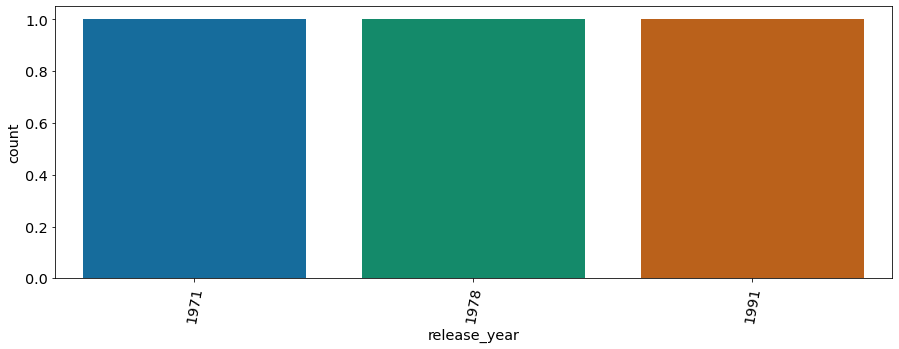

Romance


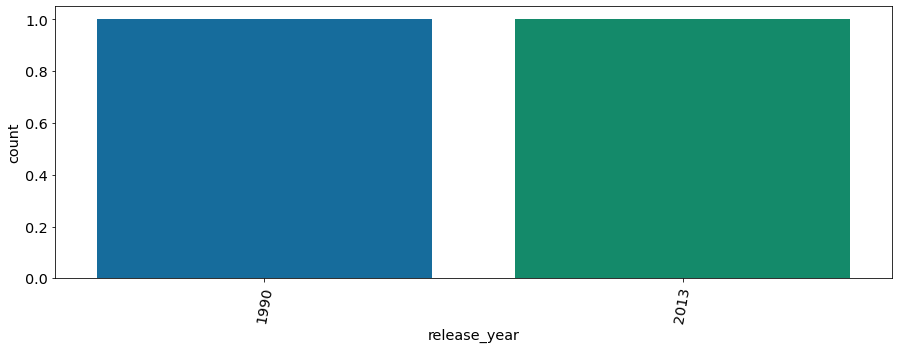

War


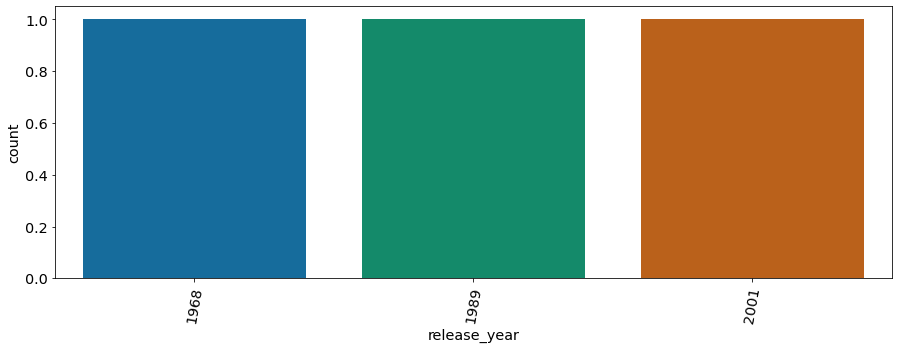

History


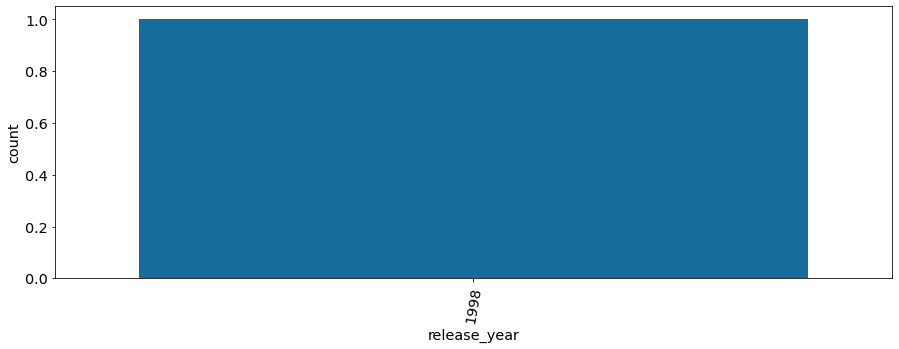

Music


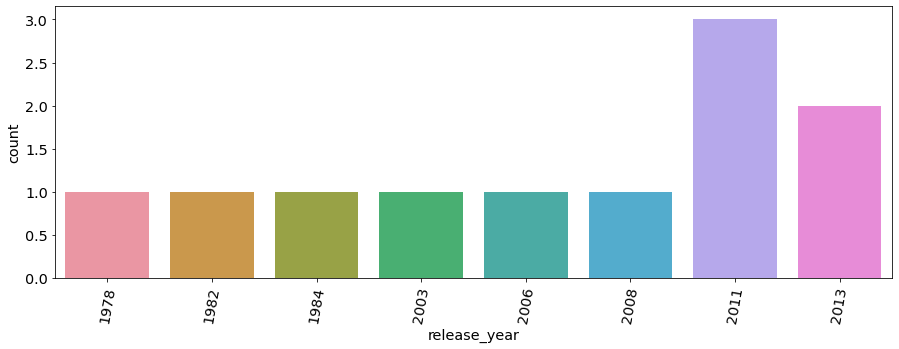

Horror


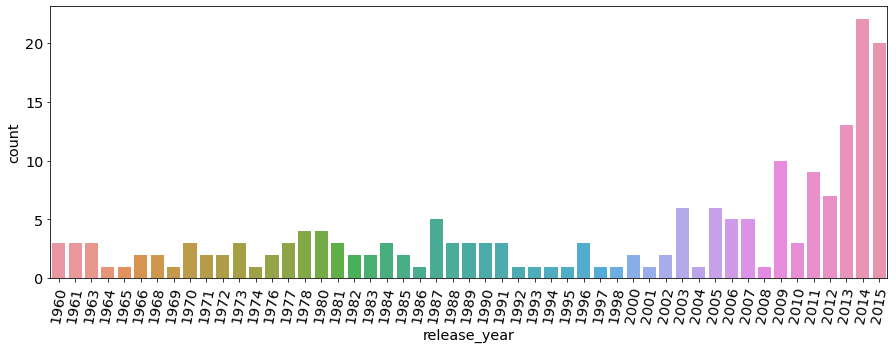

Documentary


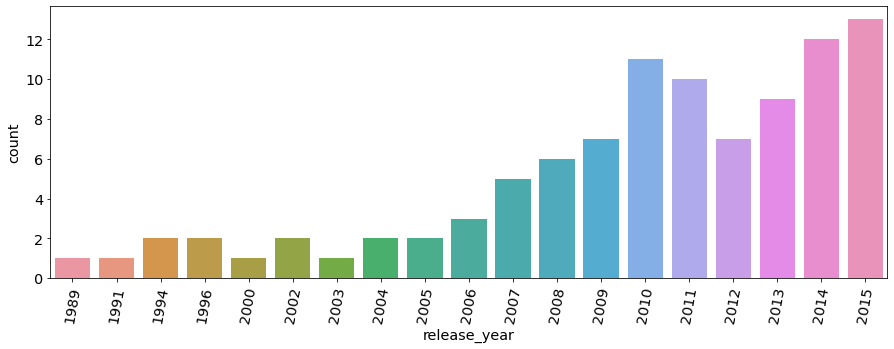

TV Movie


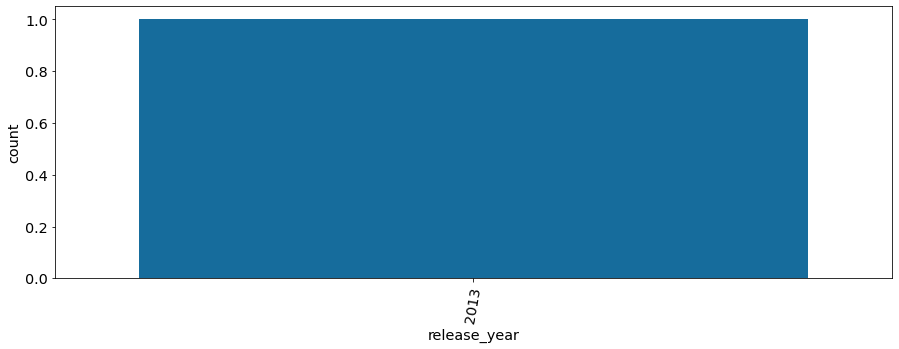

In [148]:
for x in genre:
    print(x)
    countplot(df, '{}'.format(x))

Rate of movie production over years for each movie genre:

    Drama Movies: The highest year of Drama is 2014
    
    Comedy Movies: The highest year of Comedy is 2013
    
    Romance Movies: The highest year of Romance is 1990 &2013
    
    Animation Movies: The highest year of Animation is 2012 & 1986
    
    Action Movies: The highest year of Action is 2014
    
    Fantasy Movies: The highest year of Fantasy is the same (1981,1982,1994,1996,1999,2011)
    
    Western Movies: The highest year of Western is 1973, the rate is descending
    
    Science Fiction Movies: The highest year of Science Fiction is 2012

### Q: Which genres are most popular, profitable, high rated, high vote count from year to year?

In [149]:
# getting the profit and appending it into profit column
df['all_revenue'] = df.revenue + df.revenue_adj
df['all_budget'] = df.budget + df.budget_adj
df['profit'] = df.all_revenue - df.all_budget
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,all_revenue,all_budget,profit
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,2.905975e+09,2.879999e+08,2.617975e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,7.265976e+08,2.879999e+08,4.385977e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,5.668572e+08,2.112000e+08,3.556573e+08
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,3.970901e+09,3.839999e+08,3.586901e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,2.891998e+09,3.647999e+08,2.527198e+09


In [173]:
# function to get data and concatenating it to one of the dataset properties classification
# Here we need to split movie genres and connecting each genre with its related data
def get_data(data, column):
    data = data[column].str.cat(sep='|')
    data = pd.Series(data.split('|')).str.strip()
    data_counts = data.value_counts(ascending=True)
    return data_counts
#get_data(df, 'genres')

def drow(y, color):
    movies = get_data(y, 'genres')
    movies.plot(kind='bar', figsize=(16,16), color='{}'.format(color))
    plt.xlabel('movie genre',fontsize= 14)
    plt.ylabel('NO.of movies',fontsize= 14)
    
#drow(highest_profit, 'yellowgreen')

getting the highest profit data and connecting them to its related movie genre

profit and genres relationship


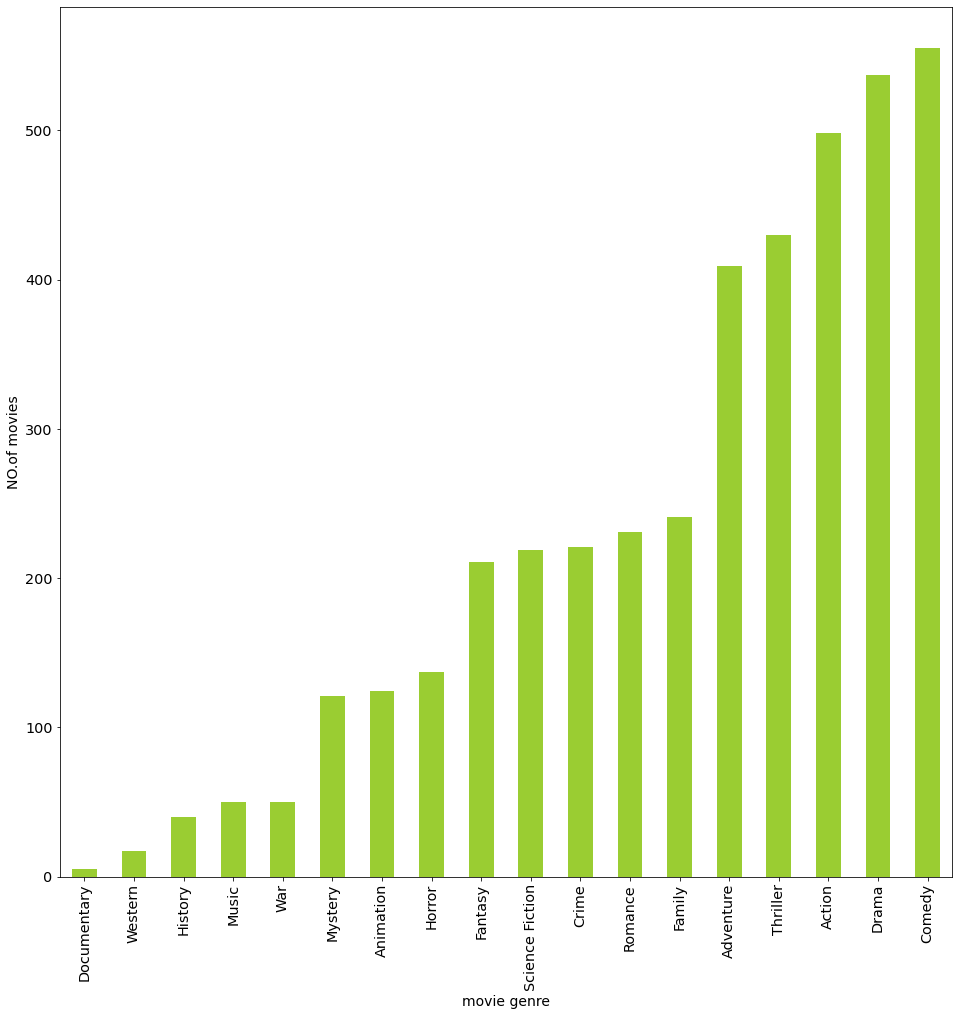

In [174]:
# getting the highest profit data and connecting them to its related movie genre
print('profit and genres relationship')
highest_profit = df[df.profit > df.profit.mean()]
drow(highest_profit, 'yellowgreen')

getting the highest vote average data and connecting them to its related movie genre

highest vote average and genres relationship


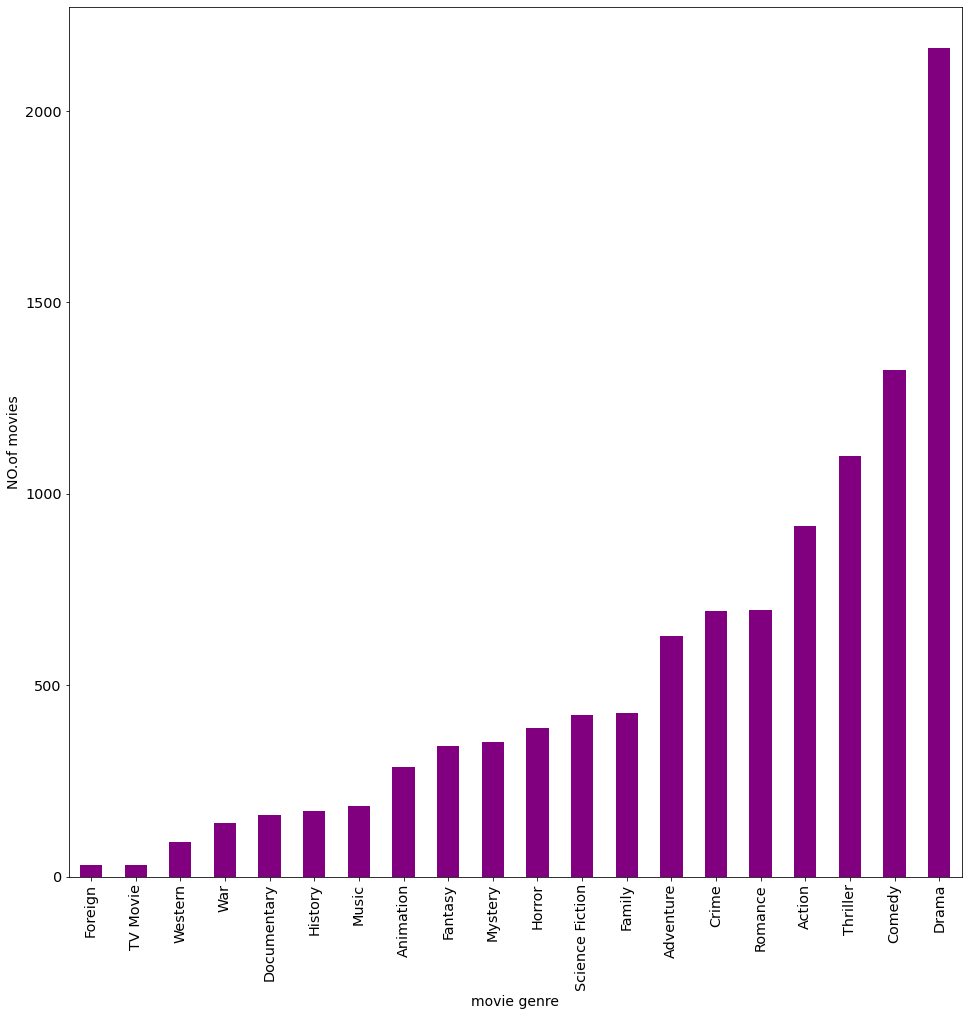

In [175]:
# getting the highest vote average data and connecting them to its related movie genre
print('highest vote average and genres relationship')
highest_vote_average = df[df.vote_average > df.vote_average.mean()]
drow(highest_vote_average, 'purple')

getting the highest vote_count data and connecting them to its related movie genre

highest vote count and genres relationship


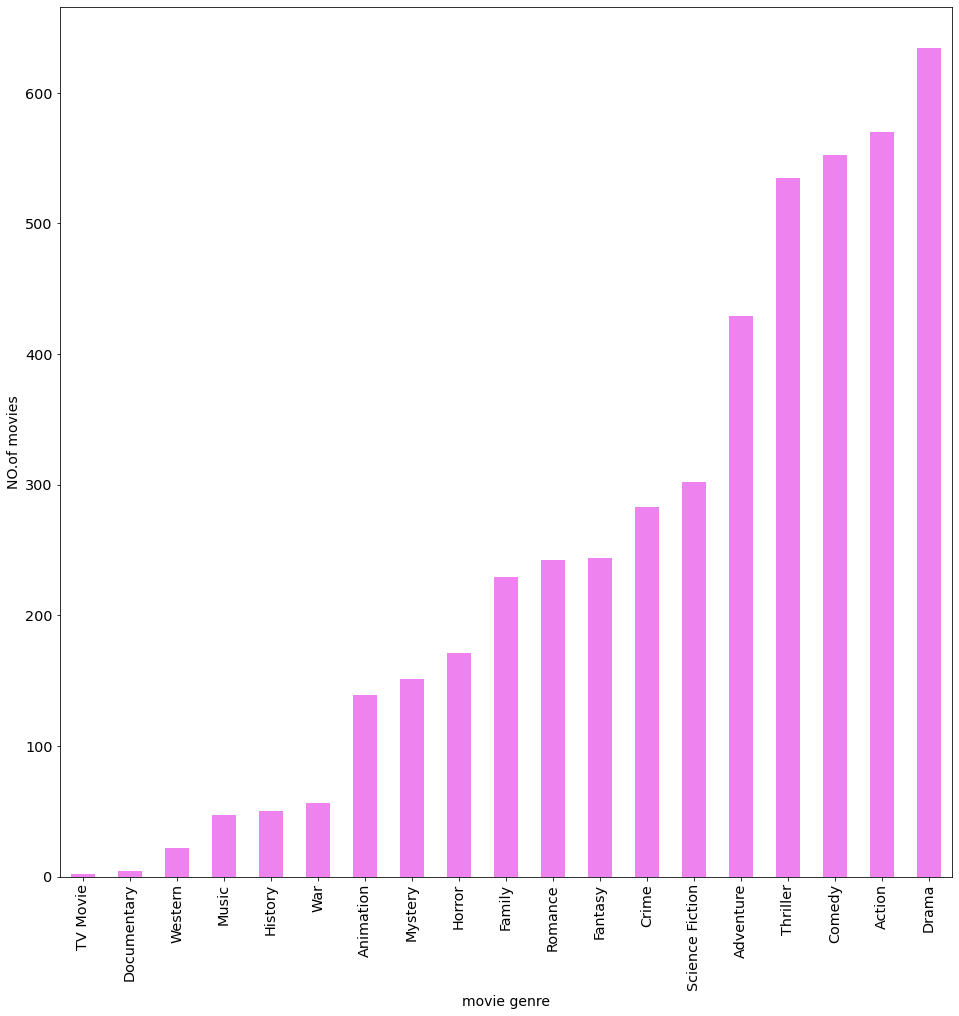

In [176]:
# getting the highest vote count data and connecting them to its related movie genre
print('highest vote count and genres relationship')
highest_vote_count = df[df.vote_count > df.vote_count.mean()]
drow(highest_vote_count, 'violet')

getting the highest popularity data and connecting them to its related movie genre

highest popularity and genres relationship


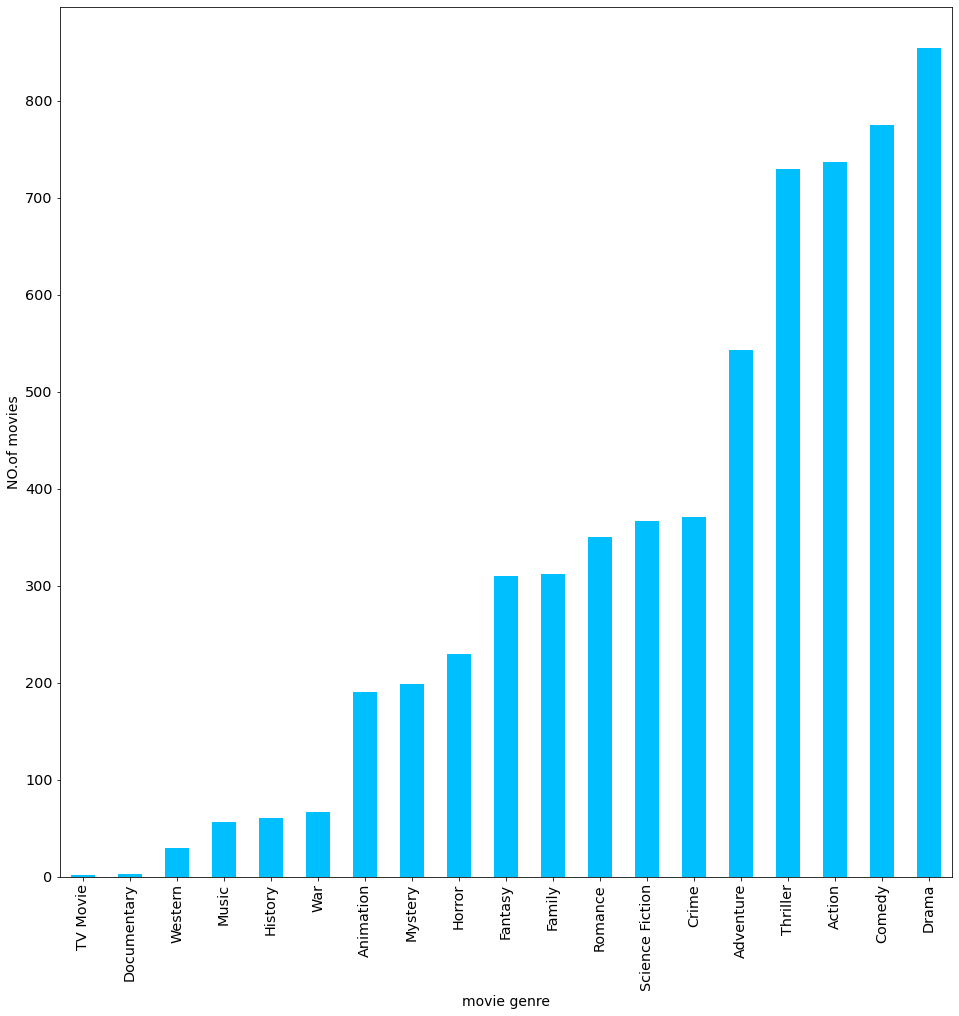

In [177]:
# getting the highest popularity data and connecting them to its related movie genre
print('highest popularity and genres relationship')
highest_popularity = df[df.popularity > df.popularity.mean()]
drow(highest_popularity, '#00BFFF')

The highest profitable, rated, vote_count, popular movie genre:

    The most Profitable movie genres are First: Comedy, Second: Drama, Third: Action
    
    The highest rated movie genres are First: Drama, Second: Comedy, Third: Thriller
    
    The most vote_count movie genres are First: Drama, Second: Action, Third: Comedy
    
    The most Popular movie genres are First: Drama, Second: Comedy, Third: Action

## TOP 10 Movies

### Q: What kinds of properties are associated with movies that have high revenues?

getting the Top 10 highest revenue movies and their properties

In [49]:
# getting the Top 10 highest revenue movies and their properties
top_10 = df.all_revenue.nlargest(10).index
df.loc[top_10]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,all_revenue,all_budget,profit
1386,19995,tt0499549,9.432768,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Enter the World of Pandora.,"In the 22nd century, a paraplegic Marine is di...",162.0,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09,5.608630e+09,4.778869e+08,5.130743e+09
5231,597,tt0120338,4.355219,200000000.0,1.845034e+09,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,Nothing on Earth could come between them.,"84 years later, a 101-year-old woman named Ros...",194.0,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.3,1997,2.716921e+08,2.506406e+09,4.351440e+09,4.716921e+08,3.879748e+09
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,3.970901e+09,3.839999e+08,3.586901e+09
1329,11,tt0076759,12.037933,11000000.0,7.753980e+08,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,"A long time ago in a galaxy far, far away...",Princess Leia is captured and held hostage by ...,121.0,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,4428,7.9,1977,3.957559e+07,2.789712e+09,3.565110e+09,5.057559e+07,3.514535e+09
4361,24428,tt0848228,7.637767,220000000.0,1.519558e+09,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,Some assembly required.,When an unexpected enemy emerges and threatens...,143.0,Science Fiction|Action|Adventure,Marvel Studios,2012-04-25,8903,7.3,2012,2.089437e+08,1.443191e+09,2.962749e+09,4.289437e+08,2.533806e+09
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,2.905975e+09,2.879999e+08,2.617975e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,2.891998e+09,3.647999e+08,2.527198e+09
14,99861,tt2395427,5.944927,280000000.0,1.405036e+09,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,A New Age Has Come.,When Tony Stark tries to jumpstart a dormant p...,141.0,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,2015-04-22,4304,7.4,2015,2.575999e+08,1.292632e+09,2.697668e+09,5.375999e+08,2.160068e+09
8094,1642,tt0113957,1.136610,22000000.0,1.106280e+09,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Irwin Winkler,Her driver's license. Her credit cards. Her ba...,Angela Bennett is a freelance software enginee...,114.0,Crime|Drama|Mystery|Thriller|Action,Columbia Pictures,1995-07-28,201,5.6,1995,3.148127e+07,1.583050e+09,2.689329e+09,5.348127e+07,2.635848e+09
3374,12445,tt1201607,5.711315,125000000.0,1.327818e+09,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,It all ends here.,"Harry, Ron and Hermione continue their quest t...",130.0,Adventure|Family|Fantasy,Warner Bros.|Heyday Films|Moving Picture Compa...,2011-07-07,3750,7

##### TOP 10 highest revenue:
    Avatar
    
    Titanic
    
    Star Wars: The Force Awakens	
    
    Star Wars	
    
    The Avengers	
    
    Jurassic World	
    
    Furious 7	
    
    Avengers: Age of Ultron	
    
    The Net	
    
    Harry Potter and the Deathly Hallows: Part 2	

### Q: What kinds of properties are associated with the most popular movies?

getting the Top 10 highest popular movies and their properties

In [50]:
# getting the Top 10 highest popular movies and their properties
top_10 = df['popularity'].nlargest(10).index
df.loc[top_10]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,all_revenue,all_budget,profit
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,2.905975e+09,2.879999e+08,2.617975e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,7.265976e+08,2.879999e+08,4.385977e+08
629,157336,tt0816692,24.949134,165000000.0,6.217525e+08,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,Mankind was born on Earth. It was never meant ...,Interstellar chronicles the adventures of a gr...,169.0,Adventure|Drama|Science Fiction,Paramount Pictures|Legendary Pictures|Warner B...,2014-11-05,6498,8.0,2014,1.519800e+08,5.726906e+08,1.194443e+09,3.169800e+08,8.774631e+08
630,118340,tt2015381,14.311205,170000000.0,7.733124e+08,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,All heroes start somewhere.,"Light years from Earth, 26 years after being a...",121.0,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,2014-07-30,5612,7.9,2014,1.565855e+08,7.122911e+08,1.485604e+09,3.265855e+08,1.159018e+09
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,5.668572e+08,2.112000e+08,3.556573e+08
631,100402,tt1843866,12.971027,170000000.0,7.147666e+08,Captain America: The Winter Soldier,Chris Evans|Scarlett Johansson|Sebastian Stan|...,Joe Russo|Anthony Russo,In heroes we trust.,After the cataclysmic events in New York with ...,136.0,Action|Adventure|Science Fiction,Marvel Studios,2014-03-20,3848,7.6,2014,1.565855e+08,6.583651e+08,1.373132e+09,3.265855e+08,1.046546e+09
1329,11,tt0076759,12.037933,11000000.0,7.753980e+08,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,"A long time ago in a galaxy far, far away...",Princess Leia is captured and held hostage by ...,121.0,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,4428,7.9,1977,3.957559e+07,2.789712e+09,3.565110e+09,5.057559e+07,3.514535e+09
632,245891,tt2911666,11.422751,20000000.0,7.873990e+07,John Wick,Keanu Reeves|Michael Nyqvist|Alfie Allen|Wille...,Chad Stahelski|David Leitch,Don't set him off.,"After the sudden death of his beloved wife, Jo...",101.0,Action|Thriller,Thunder Road Pictures|Warner Bros.|87Eleven|De...,2014-10-22,2712,7.0,2014,1.842182e+07,7.252661e+07,1.512665e+08,3.842182e+07,1.128447e+08
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,3.970901e+09,3.839999e+08,3.586901e+09
633,131631,tt1951265,10.739009,125000000.0,7.521002e+08,The Hunger Games: Mockingjay - Part 1,Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...,Francis Lawrence,Fire burns brighter in the darkness,Katniss Everdeen reluctantly bec

##### TOP 10 highest popular:
    Jurassic World	
    
    Mad Max: Fury Road	
    
    Interstellar

    Guardians of the Galaxy	

    Insurgent

    Captain America: The Winter Soldier	

    Star Wars	

    John Wick	

    Star Wars: The Force Awakens	

    The Hunger Games: Mockingjay - Part 1	

### Q: What kinds of properties are associated with the highest rated movies?

getting the Top 10 highest rated movies and their properties

In [51]:
# getting the Top 10 highest rated movies and their properties
top_10 = df['vote_average'].nlargest(10).index
df.loc[top_10]

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,all_revenue,all_budget,profit
609,321640,tt4299972,0.033378,1.462429e+07,3.982690e+07,The Jinx: The Life and Deaths of Robert Durst,Robert Durst|Andrew Jarecki|Marc Smerling|Zach...,Andrew Jarecki,Four Decades. Three Murders. And One Very Rich...,"Robert Durst, scion of one of New Yorkâ€™s bil...",240.0,Documentary,Blumhouse Productions|Hit the Ground Running F...,2015-02-08,72,8.4,2015,1.754989e+07,5.136900e+07,9.119590e+07,3.217418e+07,5.902172e+07
4178,278,tt0111161,7.192039,2.500000e+07,2.834147e+07,The Shawshank Redemption,Tim Robbins|Morgan Freeman|Bob Gunton|William ...,Frank Darabont,Fear can hold you prisoner. Hope can set you f...,Framed in the 1940s for the double murder of h...,142.0,Drama|Crime,Castle Rock Entertainment,1994-09-10,5754,8.4,1994,3.677779e+07,4.169346e+07,7.003493e+07,6.177779e+07,8.257143e+06
7948,24128,tt0088178,0.283191,1.200000e+06,4.978922e+06,Stop Making Sense,David Byrne|Tina Weymouth|Chris Frantz|Jerry H...,Jonathan Demme,Why stop making sense? Why a movie? Why a big ...,David Byrne walks onto the stage and does a so...,88.0,Documentary|Music,Talking Heads|Arnold Stiefel Company,1984-11-16,23,8.4,1984,2.518850e+06,1.045097e+07,1.542989e+07,3.718850e+06,1.171104e+07
7269,238,tt0068646,5.738034,6.000000e+06,2.450664e+08,The Godfather,Marlon Brando|Al Pacino|James Caan|Richard S. ...,Francis Ford Coppola,An offer you can't refuse.,"Spanning the years 1945 to 1955, a chronicle o...",175.0,Drama|Crime,Paramount Pictures|Alfran Productions,1972-03-15,3970,8.3,1972,3.128737e+07,1.277914e+09,1.522980e+09,3.728737e+07,1.485693e+09
650,244786,tt2582802,4.780419,3.300000e+06,1.399309e+07,Whiplash,Miles Teller|J.K. Simmons|Melissa Benoist|Aust...,Damien Chazelle,The road to greatness can take you to the edge.,"Under the direction of a ruthless instructor, ...",105.0,Drama|Music,Bold Films|Blumhouse Productions|Right of Way ...,2014-10-10,2372,8.2,2014,3.039600e+06,1.288891e+07,2.688201e+07,6.339600e+06,2.054241e+07
9315,20423,tt0097372,0.163885,1.462429e+07,3.982690e+07,For All Mankind,Jim Lovell|Russell Schweickart|Eugene Cernan|M...,Al Reinert,A Film by Al Reinert,"In July 1969, the space race ended when Apollo...",80.0,Documentary,Apollo Associates|FAM Productions,1989-01-01,16,8.2,1989,1.754989e+07,5.136900e+07,9.119590e+07,3.217418e+07,5.902172e+07
2389,55244,tt1621444,0.052322,1.462429e+07,1.339650e+06,Bill Cunningham New York,Bill Cunningham|Tom Wolfe|Anna Wintour|Carmen ...,Richard Press,"He who seeks beauty, will find it.",Chronicles a man who is obsessively interested...,84.0,Documentary,First Thought Films,2010-03-24,16,8.1,2010,1.754989e+07,1.339650e+06,2.679300e+06,3.217418e+07,-2.949488e+07
2409,550,tt0137523,8.947905,6.300000e+07,1.008538e+08,Fight Club,Edward Norton|Brad Pitt|Meat Loaf|Jared Leto|H...,David Fincher,How much can you know about yourself if you've...,A ticking-time-bomb insomniac and a slippery s...,139.0,Drama,Regency Enterprises|Fox 2000 Pictures|Taurus F...,1999-10-14,5923,8.1,1999,8.247033e+07,1.320229e+08,2.328766e+08,1.454703e+08,8.740632e+07
2875,155,tt0468569,8.466668,1.850000e+08,1.001922e+09,The Dark Knight,Christian Bale|Michael Caine|Heath Ledger|Aaro...,Christopher Nolan,Why So Serious?,Batman raises the stakes in his war on crime. ...,152.0,Drama|Action|Crime|Thriller,DC Comics|Legendary Pictures|Warner Bros.|Syncopy,2008-07-16,8432,8.1,2008,1.873655e+08,1.014733e+09,2.016655e+09,3.723655e+08,1.644289e+09
3826,414419,tt6019206,0.146477,3.000000e+07,3.982690e+07,Kill Bill: The Whole Bloody Affair,Uma Thurman|Lucy Liu|Vivica A. Fox|Daryl Hanna...,Quentin Tarantino,The bride is back for the final cut,Kill Bill: The Whole Bloody affair is a comple...,247.0,Crime|Action,Miramax Films|A Band Apart|Super Cool ManChu,2011-03-28,28,8.1,2011,2.908194e+07,5.136900e+07,9.119590e+07,

##### TOP 10 rated:
    The Jinx: The Life and Deaths of Robert Durst	
    
    The Shawshank Redemption	
    
    Stop Making Sense	
    
    The Godfather	
    
    Whiplash
    
    For All Mankind	
    
    Bill Cunningham New York	
    
    Fight Club	
    
    The Dark Knight	
    
    Kill Bill: The Whole Bloody Affair	

### Q: What is the relation between popularity and vote_count?

visualizing the realtionship between popularity and vote_count by scatter plot to clarify the effect of popularity on the vote count

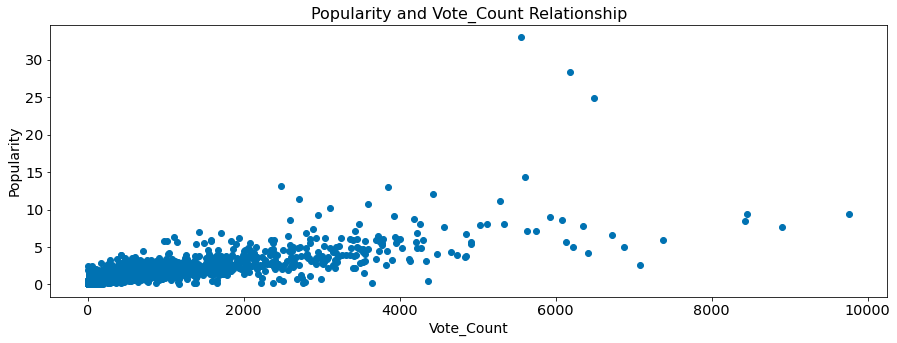

<Figure size 1152x1152 with 0 Axes>

In [52]:
# visualizing the realtionship between popularity and vote_count by scatter plot
plt.scatter(df.vote_count, df.popularity)
plt.xlabel('Vote_Count', fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.title('Popularity and Vote_Count Relationship', fontsize= 16)
plt.figure(figsize=(16, 16));

##### Relation between popularity and vote_count:
The Distribution is skewed to left , positive relationship

### Q: What is the relation between the vote_count and vote_average?

visualizing the realtionship between vote_average and vote_count by scatter plot and clarify their effect on each other

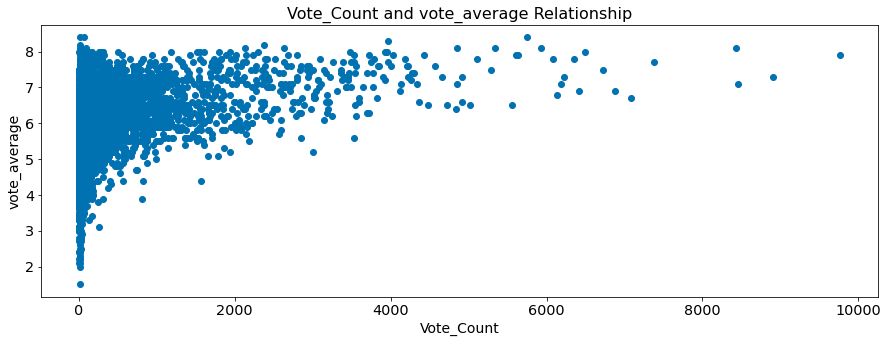

<Figure size 1152x1152 with 0 Axes>

In [53]:
# visualizing the realtionship between vote_rate and vote_count by scatter plot
plt.scatter(df.vote_count, df.vote_average)
plt.xlabel('Vote_Count', fontsize=14)
plt.ylabel('vote_average', fontsize=14) 
plt.title('Vote_Count and vote_average Relationship', fontsize= 16)
plt.figure(figsize=(16, 16));

##### Relation between the vote_count and vote rate:
No effect of the vote count on the vote rate

### Q: Is there a relation between the budget and the runtime ?

visualizing the realtionship between budget and runtime by scatter plot and if the long runtime increasing the budget or not

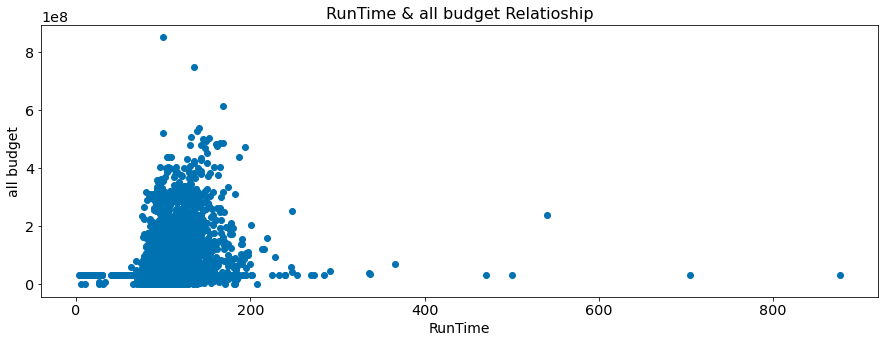

<Figure size 1152x1152 with 0 Axes>

In [54]:
# visualizing the realtionship between budget and runtime by scatter plot
plt.scatter(df.runtime, df.all_budget)
plt.xlabel('RunTime', fontsize=14)
plt.ylabel('all budget', fontsize=14)
plt.title('RunTime & all budget Relatioship', fontsize= 16)
plt.figure(figsize=(16, 16));

##### Relation between the budget and the runtime:
No effect of the long runtime on increasing the budget

### Q: Is there a relation between the all budget and the all revenue ?

visualizing the realtionship between all budget and all revenue by scatter plot to clarify if there a relation between budget and revenue

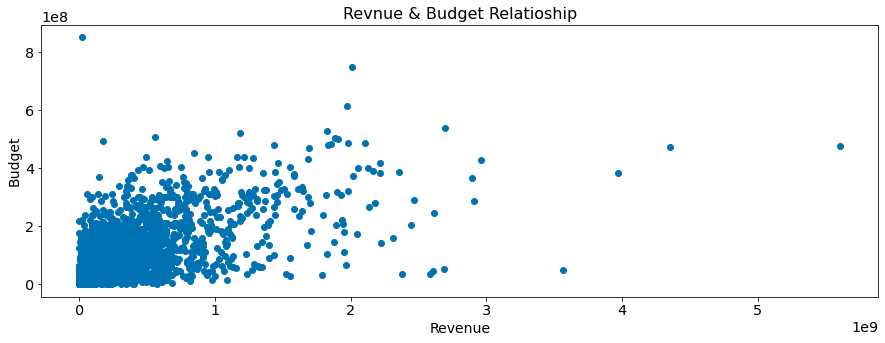

<Figure size 1152x1152 with 0 Axes>

In [55]:
# visualizing the realtionship between all budget and all revenue by scatter plot
plt.scatter(df.all_revenue, df.all_budget)
plt.xlabel('Revenue', fontsize=14)
plt.ylabel('Budget', fontsize=14)
plt.title('Revnue & Budget Relatioship', fontsize= 16)
plt.figure(figsize=(16, 16));

##### Relation between the budget and the revenue:
The Distribution is skewed to the left , positive relationship

### Q: Most Popular Directors?

get the Top 10 Directors over the time and their movie number they directed

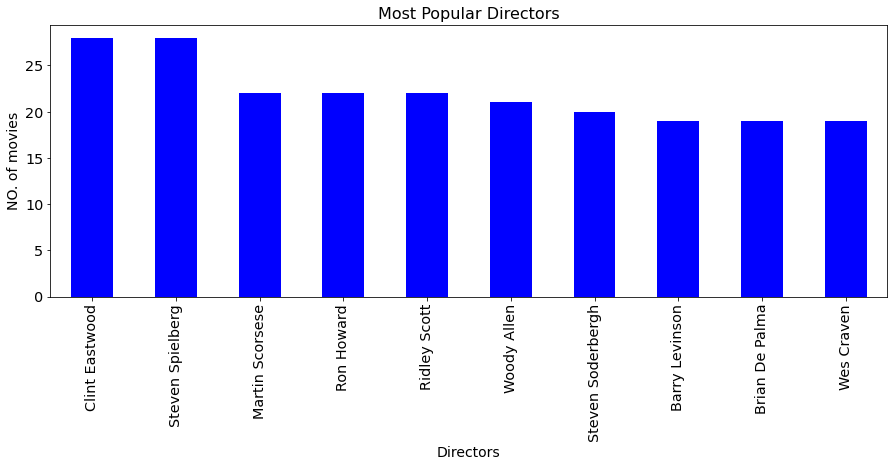

In [56]:
Directors = df.director.value_counts().nlargest(10)
Directors.plot(kind='bar', color='blue')
plt.xlabel('Directors', fontsize=14)
plt.ylabel('NO. of movies', fontsize=14)
plt.title('Most Popular Directors', fontsize=16);

In [57]:
Directors = df.director.value_counts().nlargest(10)
Directors

Clint Eastwood       28
Steven Spielberg     28
Martin Scorsese      22
Ron Howard           22
Ridley Scott         22
Woody Allen          21
Steven Soderbergh    20
Barry Levinson       19
Brian De Palma       19
Wes Craven           19
Name: director, dtype: int64

##### Most Popular Directors and Number of their movies in our dataset:
    Steven Spielberg     28
    
    Clint Eastwood       28
    
    Ridley Scott         22
    
    Ron Howard           22
    
    Martin Scorsese      22
    
    Woody Allen          21
    
    Steven Soderbergh    20
    
    Brian De Palma       19
    
    Wes Craven           19
    
    Barry Levinson       19

### Q: Average Runtime?

in this visulaization we are trying to represent the average runtime of the movies and how much movies have the average runtime over time

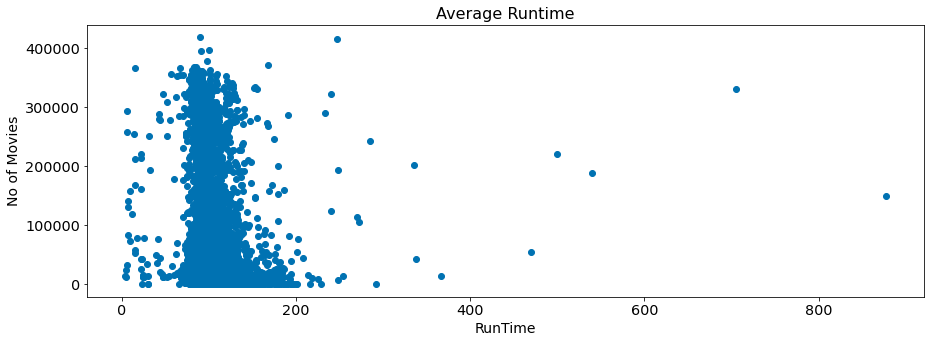

In [58]:
#sns.countplot(df.runtime)
#plt.title('Attendance statement')
#plt.show();
# visualzing the runtime average by scatter plot
plt.scatter(df.runtime, df.id)
plt.xlabel('RunTime', fontsize=14)
plt.ylabel('No of Movies', fontsize=14)
plt.title('Average Runtime', fontsize=16);

##### Average Runtime:
between 100:110 mins , meanly about 106 mins

# Conclusions

#### Rate of movie production over years for each movie genre:

    Drama Movies: The highest year of Drama is 2014
    
    Comedy Movies: The highest year of Comedy is 2013
    
    Romance Movies: The highest year of Romance is 1990 &2013
    
    Animation Movies: The highest year of Animation is 2012 & 1986
    
    Action Movies: The highest year of Action is 2014
    
    Fantasy Movies: The highest year of Fantasy is the same (1981,1982,1994,1996,1999,2011)
    
    Western Movies: The highest year of Western is 1973, the rate is descending
    
    Science Fiction Movies: The highest year of Science Fiction is 2012
    
    
    
    
    
#### The highest profitable, rated, vote_count, popular movie genre:

    The most Profitable movie genres are First: Comedy, Second: Drama, Third: Action

    The highest rated movie genres are First: Drama, Second: Comedy, Third: Thriller

    The most vote_count movie genres are First: Drama, Second: Action, Third: Comedy

    The most Popular movie genres are First: Drama, Second: Comedy, Third: Action

#### Top 10 Movies

##### TOP 10 highest revenue:
    Avatar
    
    Titanic
    
    Star Wars: The Force Awakens	
    
    Star Wars	
    
    The Avengers	
    
    Jurassic World	
    
    Furious 7	
    
    Avengers: Age of Ultron	
    
    The Net	
    
    Harry Potter and the Deathly Hallows: Part 2	

##### TOP 10 highest popular:
    Jurassic World	
    
    Mad Max: Fury Road	
    
    Interstellar

    Guardians of the Galaxy	

    Insurgent

    Captain America: The Winter Soldier	

    Star Wars	

    John Wick	

    Star Wars: The Force Awakens	

    The Hunger Games: Mockingjay - Part 1	

##### TOP 10 rated:
    The Jinx: The Life and Deaths of Robert Durst	
    
    The Shawshank Redemption	
    
    Stop Making Sense	
    
    The Godfather	
    
    Whiplash
    
    For All Mankind	
    
    Bill Cunningham New York	
    
    Fight Club	
    
    The Dark Knight	
    
    Kill Bill: The Whole Bloody Affair	


##### Relation between popularity and vote_count:
The Distribution is skewed to left , positive relationship

##### Relation between the vote_count and vote rate:
No effect of the vote count on the vote rate

##### Relation between the budget and the runtime:
No effect of the long runtime on increasing the budget

##### Relation between the budget and the revenue:
The Distribution is skewed to the left , positive relationship

##### Most Popular Directors and Number of their movies in our dataset:
    Steven Spielberg     28
    
    Clint Eastwood       28
    
    Ridley Scott         22
    
    Ron Howard           22
    
    Martin Scorsese      22
    
    Woody Allen          21
    
    Steven Soderbergh    20
    
    Brian De Palma       19
    
    Wes Craven           19
    
    Barry Levinson       19

##### Average Runtime:
between 100:110 mins , meanly about 106 mins

# Limitations

- we can see some problems in the data:

    1- We need to fill Nan cells in columns with numerical values with the mean value.

    2- We need to remove the unused and unimportnat column like ('homepage' & 'keywords')

    3- We need to remove the NaN cells from dataset.

    4- We need to convert the dtype of column ('runtime') values to integer dtype.
    

- We have used TMBD Movies dataset for our analysis and worked with popularity, revenue and runtime. Our analysis is limited to only the provided dataset. For example, the dataset does not confirm that every release of every director is listed.
There is no normalization or exchange rate or currency conversion is considered during this analysis and our analysis is limited to the numerical values of revenue.
Dropping missing or Null values from variables of our interest might skew our analysis and could show unintentional bias towards the relationship being analyzed. etc.

# Resources:

<a href="https://pandas.pydata.org/docs/">Pandas Documentation</a>

<a href="https://matplotlib.org/3.3.3/contents.html#">Matplotlib Documentation</a>

<a href="https://numpy.org/doc/1.20/">Numpy Documentation</a>

<a href="https://docs.python.org/3/">Python Documentation</a>

<a href="https://seaborn.pydata.org/">Seaborn Documentation</a>

<a href="https://www.kaggle.com/tmdb/tmdb-movie-metadata">Kaggle TMDb dataset</a>

<a href="http://ipython.readthedocs.io/en/stable/interactive/magics.html">Notebook Inline magics</a>